In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt

np.random.seed(123)

## Simulación del rendimiento de un portafolio con Moviemiento browniano

In [2]:
def get_data(stocks, start_date, end_date):
    prices = yf.download(stocks, start_date, end_date, progress = False)["Close"]
    returns = prices.pct_change().dropna()
    mean_returns = returns.mean()
    std_returns = returns.std()
    return mean_returns, std_returns, prices

In [3]:
def simular_precios(mean_returns, std_returns, prices, num_dias):
    Z = np.random.normal(0, 1, num_dias)
    simulated_returns = np.array(mean_returns) + np.array(std_returns) * Z
    cumulative_simulated_returns =  (1 + simulated_returns).cumprod()
    initial_price = np.array(prices.iloc[-1])
    simulated_prices = initial_price * cumulative_simulated_returns
    return simulated_prices

In [4]:
stocks = ['AAPL']
start_date = '2020-01-01'
end_date = '2025-01-12'
num_dias = 14

In [5]:
mean_returns, std_returns, last_price = get_data(stocks, start_date, end_date)
simulated_prices = simular_precios(mean_returns, std_returns, last_price, num_dias)

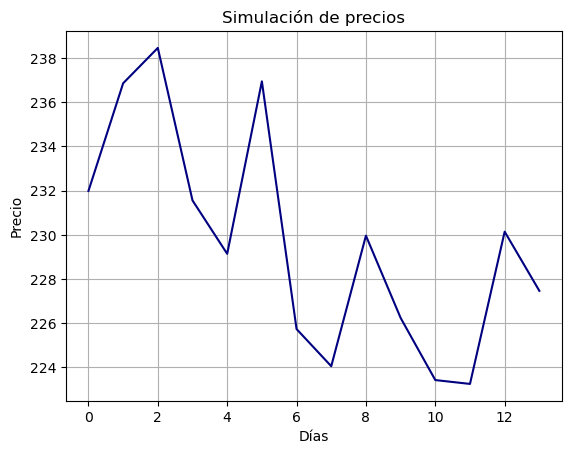

In [6]:
sim_df = pd.DataFrame(simulated_prices)
plt.plot(sim_df, c = 'navy')
plt.title('Simulación de precios')
plt.xlabel('Días')
plt.ylabel('Precio')
plt.grid()

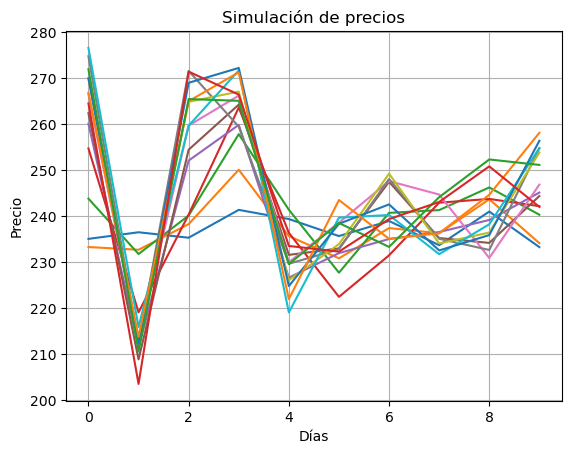

In [7]:
trayectorias_de_precios = np.zeros((10, num_dias))
mean_returns, std_returns, prices = get_data(stocks, start_date, end_date)

for i in range(10):
    precios = simular_precios(mean_returns, std_returns, prices, num_dias)
    trayectorias_de_precios[i,:] = precios

paths_df = pd.DataFrame(trayectorias_de_precios)
plt.plot(paths_df)
plt.title('Simulación de precios')
plt.xlabel('Días')
plt.ylabel('Precio')
plt.grid()